## Predicting survival rate in titanic crash

In [2]:
#Titanic Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
df = pd.read_csv('D:\\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df= df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 'columns')
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [6]:
y = df.Survived
x= df.drop(['Survived'],axis = 'columns')

In [7]:
dummies = pd.get_dummies(x.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [8]:
x = pd.concat([x,dummies],axis = 'columns')
x.head()

,Pclass,Sex,Age,female,male
0,3,male,22.0,0,1
1,1,female,38.0,1,0
2,3,female,26.0,1,0
3,1,female,35.0,1,0
4,3,male,35.0,0,1


In [11]:
x.drop(['male','Sex'],axis = 'columns',inplace = True)
x.head()

,Pclass,Age,female
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


In [12]:
x.isna().sum()

Pclass      0
Age       177
female      0
dtype: int64

In [14]:
x.Age = x.Age.fillna(x.Age.median())

In [15]:
x.isna().sum()

Pclass    0
Age       0
female    0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt = train_test_split(x,y,test_size = 0.2)

In [17]:
len(xt)

712

In [18]:
len(xtt)

179

In [19]:
from sklearn.naive_bayes import GaussianNB
m = GaussianNB()

In [20]:
m.fit(xt,yt)

GaussianNB()

In [21]:
m.score(xtt,ytt)

0.7821229050279329

In [26]:
m.predict_proba(xtt)

array([[0.74394187, 0.25605813],
       [0.82636523, 0.17363477],
       [0.92413309, 0.07586691],
       [0.11812083, 0.88187917],
       [0.86035902, 0.13964098],
       [0.92074229, 0.07925771],
       [0.84304891, 0.15695109],
       [0.92413309, 0.07586691],
       [0.03785218, 0.96214782],
       [0.60123423, 0.39876577],
       [0.03552043, 0.96447957],
       [0.11150215, 0.88849785],
       [0.8573187 , 0.1426813 ],
       [0.53246065, 0.46753935],
       [0.92979642, 0.07020358],
       [0.03131739, 0.96868261],
       [0.02874289, 0.97125711],
       [0.11812083, 0.88187917],
       [0.86071467, 0.13928533],
       [0.91495436, 0.08504564],
       [0.0343996 , 0.9656004 ],
       [0.20024312, 0.79975688],
       [0.62579004, 0.37420996],
       [0.92413309, 0.07586691],
       [0.22461668, 0.77538332],
       [0.15620991, 0.84379009],
       [0.03131739, 0.96868261],
       [0.92753899, 0.07246101],
       [0.92413309, 0.07586691],
       [0.02940812, 0.97059188],
       [0.

In [28]:
from sklearn.metrics import confusion_matrix
yp = m.predict(xtt)
cm =confusion_matrix(ytt,yp)
cm

array([[89, 18],
       [21, 51]], dtype=int64)

Text(69.0, 0.5, 'Truth')

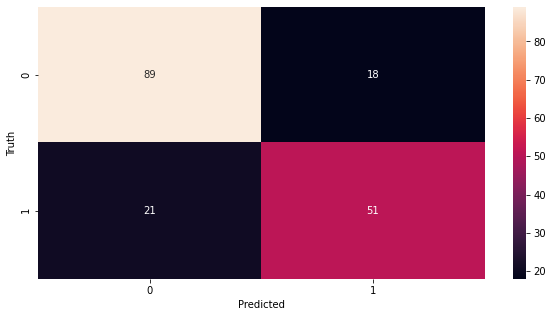

In [33]:
import seaborn as sn
plt.figure(figsize =(10,5))
sn.heatmap(cm,annot =True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## spam filter

In [35]:
d = pd.read_csv('D:\spam.csv')
d.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
d.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [41]:
d['spam'] = d['Category'].apply(lambda x:1 if x=='spam' else 0)
d.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [42]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt = train_test_split(d.Message,d.spam,test_size=0.2)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer()
xt_count= v.fit_transform(xt.values)
xt_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
from sklearn.naive_bayes import MultinomialNB
m1 = MultinomialNB()
m1.fit(xt_count,yt)

MultinomialNB()

In [46]:
email =[
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
email_count = v.transform(email)

In [47]:
m1.predict(email_count)

array([0, 1], dtype=int64)

In [50]:
xtt_count = v.transform(xtt)

In [51]:
m1.score(xtt_count,ytt)

0.9919282511210762

### Sklearn pipeline

In [56]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('Vectorizer',CountVectorizer()),
    ('nb'        , MultinomialNB())
])

In [57]:
clf.fit(xt,yt)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [58]:
clf.score(xtt,ytt)

0.9919282511210762

In [60]:
clf.predict(email)

array([0, 1], dtype=int64)

## Exercise  predicting type of wine through ingredients

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()  #inbuilt dataset wine

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [15]:
df['target'] = wine.target
df[59:70]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,1
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,1
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1


In [16]:
from sklearn.model_selection import train_test_split
xt,xtt,yt,ytt = train_test_split(wine.data,wine.target,test_size =0.2)

In [17]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
g = GaussianNB()
g.fit(xt,yt)
g.score(xtt,ytt)

1.0

In [18]:
m = MultinomialNB()
m.fit(xt,yt)
m.score(xtt,ytt)

0.8055555555555556